In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import bandit

In [3]:
n_steps = 10000

In [4]:
## Sample average
sample_avg_bandit = bandit.Bandit(n_steps=n_steps, seed=42)
sample_avg_rewards, sample_avg_optimal = sample_avg_bandit.run()

/home/joseph280996/Code/School/RL/Assignments/hw1/bandit.py:45: RuntimeWarning: overflow encountered in scalar multiply
  q_estimates[action] += alpha * (reward - q_estimates[action])
/home/joseph280996/Code/School/RL/Assignments/hw1/bandit.py:45: RuntimeWarning: invalid value encountered in scalar add
  q_estimates[action] += alpha * (reward - q_estimates[action])


In [5]:
# Run simulations
## Constant Step-size
alpha = 0.1
constant_step_bandit = bandit.Bandit(n_steps=n_steps, alpha=alpha, seed=42)
constant_step_rewards, constant_step_optimal = constant_step_bandit.run()


ValueError: 'a' and 'p' must have same size

In [22]:
## Gradient Bandit
gradient_bandit = bandit.Bandit(n_steps, seed=42, use_gradient=True)
gradient_rewards, gradient_optimal = gradient_bandit.run()

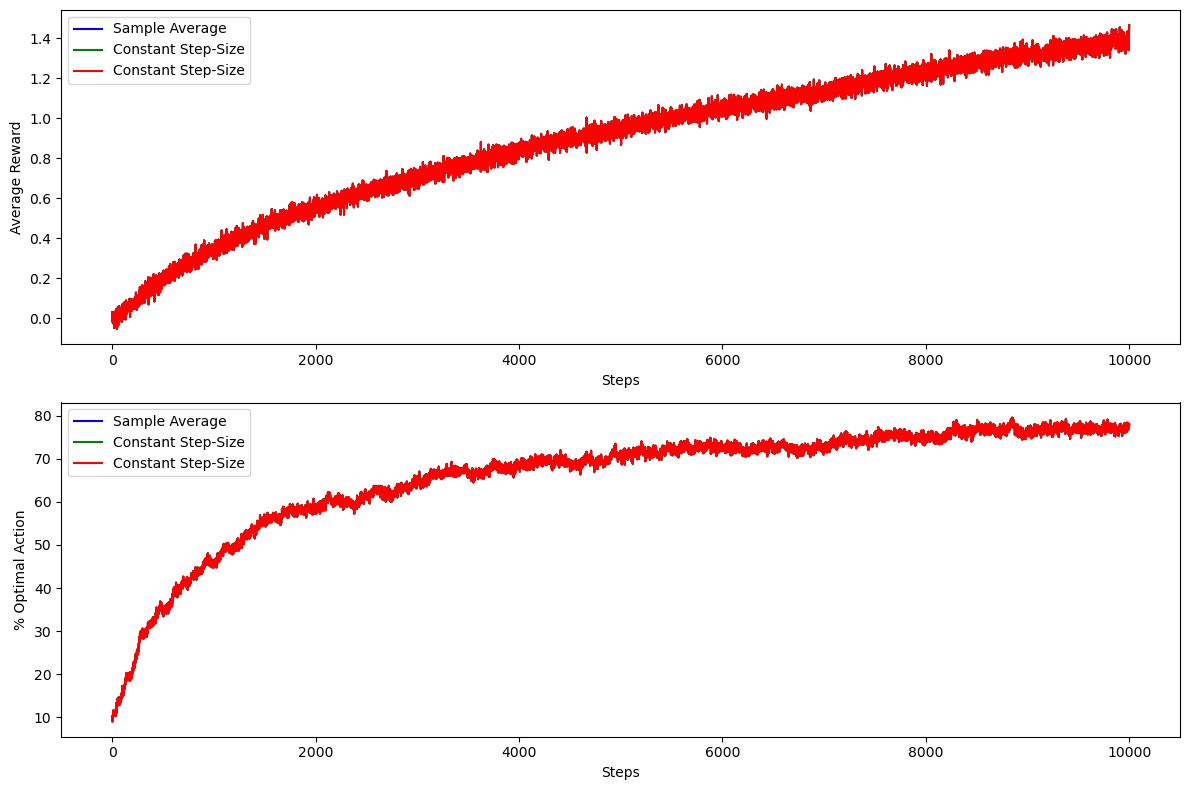

In [23]:
# Plotting the results
plt.figure(figsize=(12, 8))

# Average reward comparison
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, n_steps + 1), sample_avg_rewards, label="Sample Average", color='blue')
plt.plot(np.arange(1, n_steps + 1), constant_step_rewards, label="Constant Step-Size", color='green')
plt.plot(np.arange(1, n_steps + 1), gradient_rewards, label="Constant Step-Size", color='red')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()

# Optimal action comparison
plt.subplot(2, 1, 2)
plt.plot(np.arange(1, n_steps + 1), sample_avg_optimal * 100, label="Sample Average", color='blue')
plt.plot(np.arange(1, n_steps + 1), constant_step_optimal * 100, label="Constant Step-Size", color='green')
plt.plot(np.arange(1, n_steps + 1), gradient_optimal * 100, label="Constant Step-Size", color='red')
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.legend()

plt.tight_layout()
plt.show()